<a href="https://colab.research.google.com/github/Halskii/Machine-Learning/blob/main/Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Uploading the datasets**

For this notebook to run you must first upload the training and testing CSV files into the google collab session.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))


Saving test.csv to test.csv
Saving train.csv to train.csv
User uploaded file "test.csv" with length 61786 bytes
User uploaded file "train.csv" with length 62090 bytes


# **Importing the training and test datasets**

This section converts the uploaded CSV files into pandas dataframes via the read_csv function.

In [ ]:
import pandas as pd
import numpy as np
import io

train_data = pd.read_csv(io.BytesIO(uploaded['train.csv']))
train_data.head()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       284 non-null    int64  
 1   radius_mean              284 non-null    float64
 2   texture_mean             284 non-null    float64
 3   perimeter_mean           284 non-null    float64
 4   area_mean                284 non-null    float64
 5   smoothness_mean          284 non-null    float64
 6   compactness_mean         284 non-null    float64
 7   concavity_mean           284 non-null    float64
 8   concave points_mean      284 non-null    float64
 9   symmetry_mean            284 non-null    float64
 10  fractal_dimension_mean   284 non-null    float64
 11  radius_se                284 non-null    float64
 12  texture_se               284 non-null    float64
 13  perimeter_se             284 non-null    float64
 14  area_se                  2

In [ ]:
test_data = pd.read_csv(io.BytesIO(uploaded['test.csv']))
test_data.head()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       285 non-null    int64  
 1   radius_mean              285 non-null    float64
 2   texture_mean             285 non-null    float64
 3   perimeter_mean           285 non-null    float64
 4   area_mean                285 non-null    float64
 5   smoothness_mean          285 non-null    float64
 6   compactness_mean         285 non-null    float64
 7   concavity_mean           285 non-null    float64
 8   concave points_mean      285 non-null    float64
 9   symmetry_mean            285 non-null    float64
 10  fractal_dimension_mean   285 non-null    float64
 11  radius_se                285 non-null    float64
 12  texture_se               285 non-null    float64
 13  perimeter_se             285 non-null    float64
 14  area_se                  2

# **Analysis of our data**

Contained in this section are a series of visual tools for getting a feel for our data. Through our heatmap we can see the correlation of our datasets different features. Heatmaps are good as a visual, but for this dataset it's a bit hard to determine which features are the most applicable from a visual perspective. There are some features that should have the most impact on whether a tumor is benign or malignant, and there are gonna be a few fields that may make little to no difference, we are computer scientists though and not tumor specialists, and so I will leave the determining of these applicable features up to our models discretion.


In [ ]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,284.0,141.500000,82.127949,0.000000,70.750000,141.500000,212.250000,283.00000
radius_mean,284.0,14.133384,3.557272,6.981000,11.807500,13.205000,16.132500,27.22000
texture_mean,284.0,19.354824,4.308783,9.710000,16.060000,18.945000,21.825000,32.47000
perimeter_mean,284.0,91.963310,24.449770,43.790000,76.097500,85.250000,106.450000,182.10000
area_mean,284.0,656.370423,353.886842,143.500000,428.675000,540.250000,799.100000,2250.00000
smoothness_mean,284.0,0.095307,0.014372,0.062510,0.084668,0.094155,0.104825,0.16340
compactness_mean,284.0,0.102288,0.050656,0.019380,0.062740,0.093435,0.127975,0.28670
concavity_mean,284.0,0.088245,0.079657,0.000000,0.029640,0.061745,0.127700,0.42680
concave points_mean,284.0,0.047708,0.038772,0.000000,0.019603,0.033025,0.070468,0.20120
symmetry_mean,284.0,0.180214,0.026448,0.106000,0.161775,0.178300,0.194425,0.27430


**Heatmap of the Data**

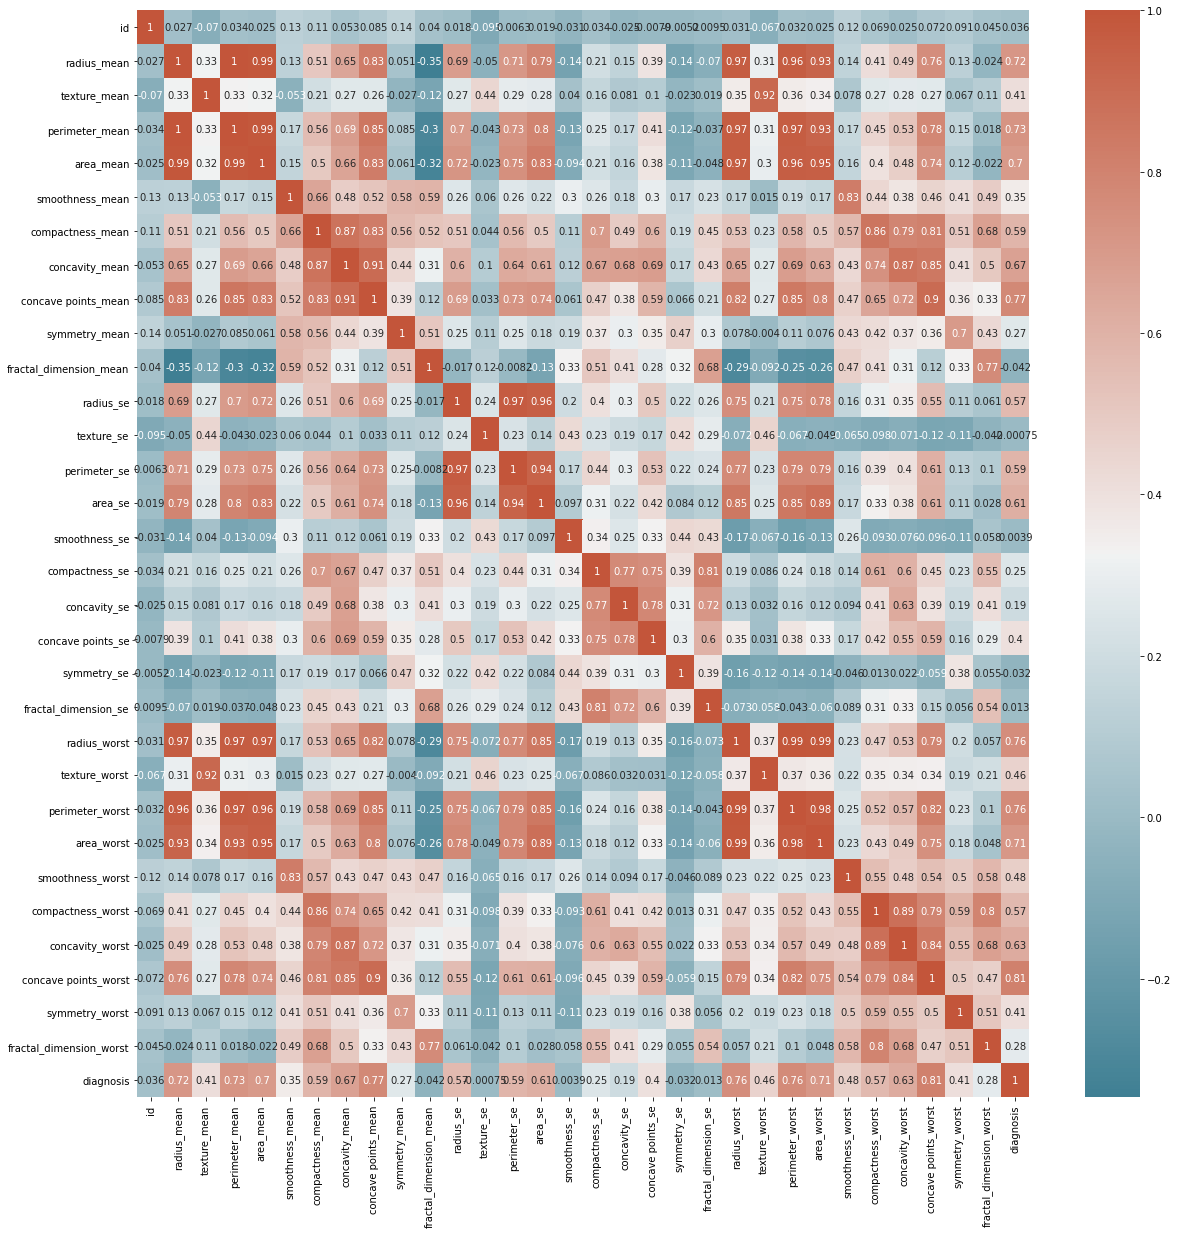

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

corr = train_data.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

**Distribution of the Data**

Here we show dist plots for each feature so we can get a feel for the distribution and see which features are skewed. 

**NOTE**: I use the warnings library; since this dataset has so many features seaborn issues a runtime warning when more than 20 plots are generated at a time. This hides those warnings.

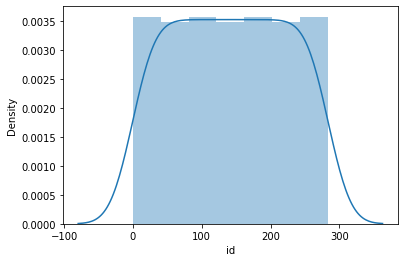

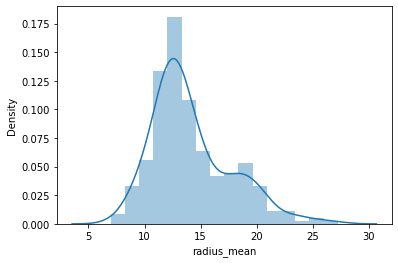

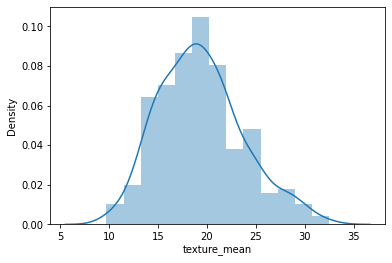

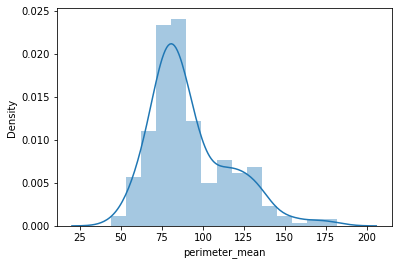

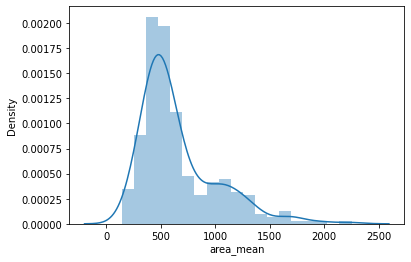

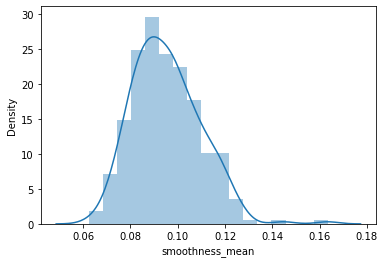

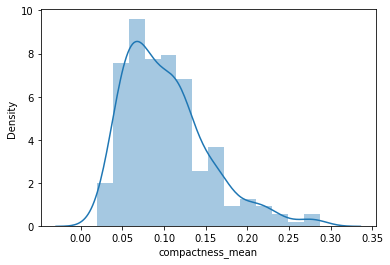

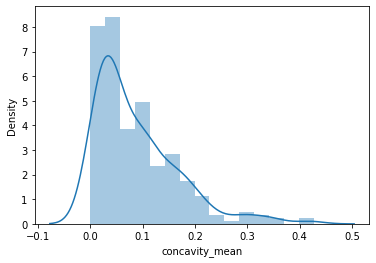

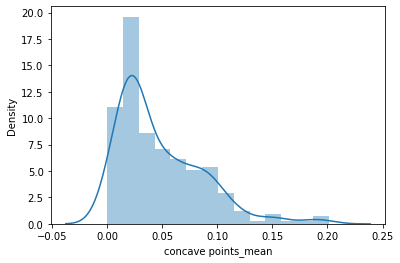

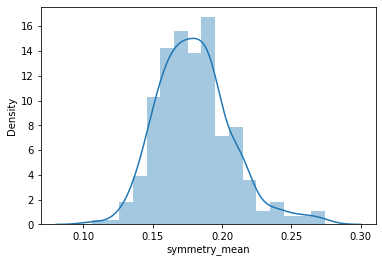

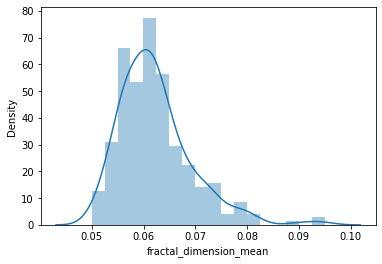

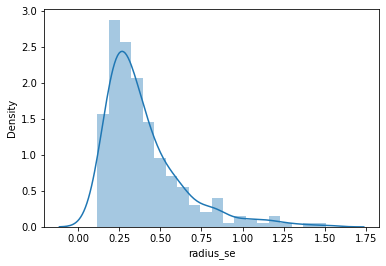

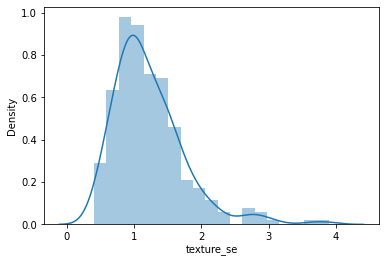

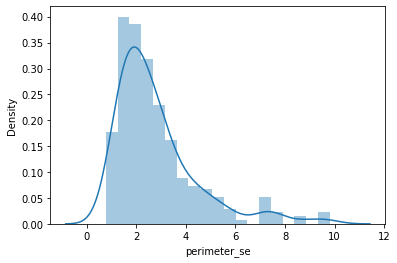

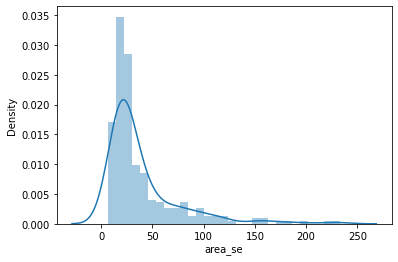

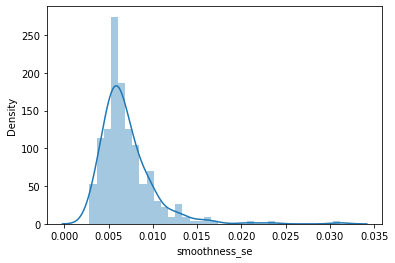

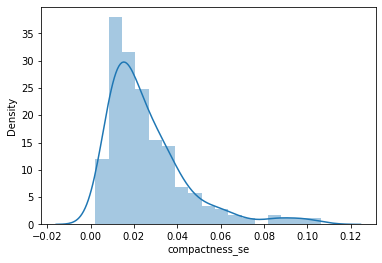

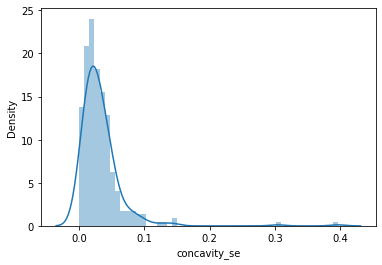

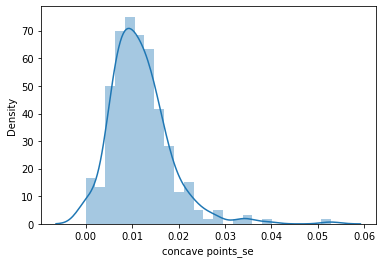

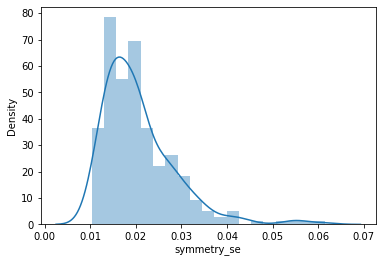

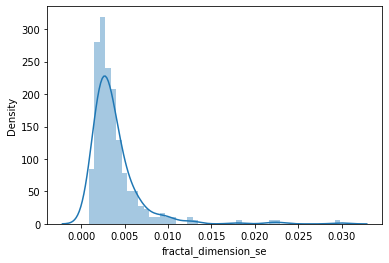

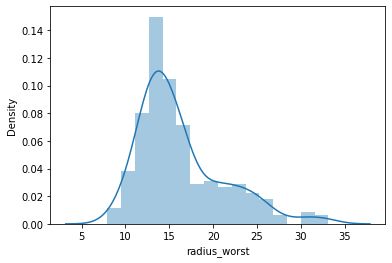

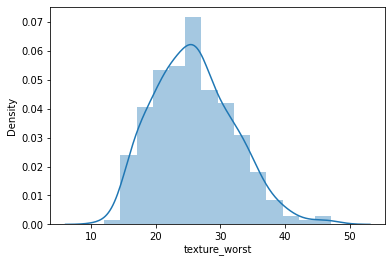

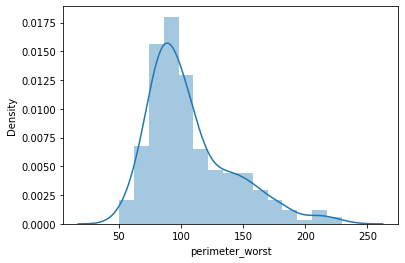

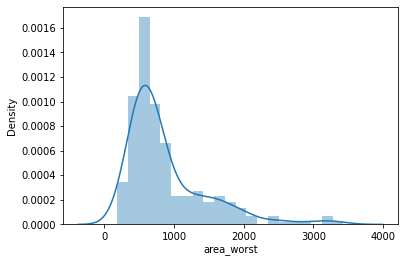

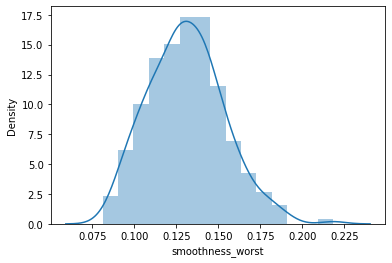

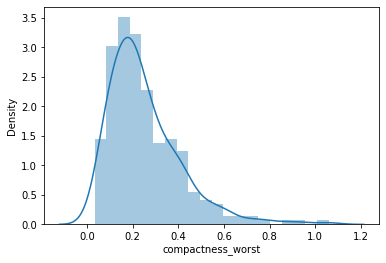

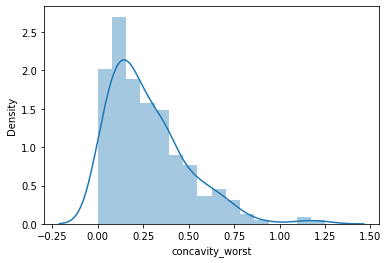

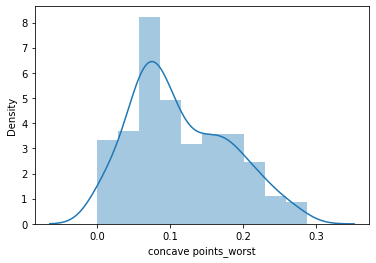

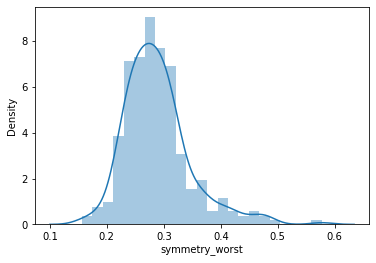

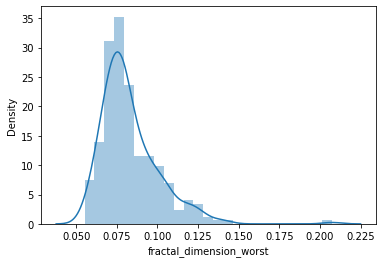

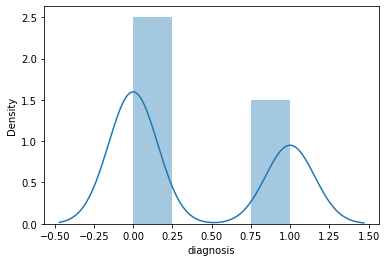

In [ ]:
import warnings
warnings.filterwarnings('ignore')

for column in train_data:
  plt.figure()
  sns.distplot(train_data[column])

# **Checking for NaN values in the training data**

In this cell is a simple function to check whether NaN values exist in the data. Imputation will be implemented in our eventual pipeline to handle any potential missing values.

In [ ]:
nans = train_data.isnull().sum()
if(np.all(nans) == 0) : print("No NaN values")
else                    : print("There are some NaN values...")

No NaN values


# **Outliers**

To get a grasp of how many outliers are in each feature, here we use interquartile ranges to determine which values are outliers using 25% as our lower bound, and 75% as our upper bound.


**I chose to ignore these outliers as preprocessing the data seemed to lower my F1 score so they must be vital to the dataset.**

In [ ]:
higherQ = .75
lowerQ =.25

quantiles = train_data.iloc[:, :].quantile([lowerQ, higherQ]).transpose()

# Calculates thresholds for deeming values as outliers and stores them into a pandas dataframe.
outliers = pd.DataFrame({'Lower Threshold' : quantiles[lowerQ] - (1.5 * (quantiles[higherQ] - quantiles[lowerQ])),
                         'Upper Threshold' : quantiles[higherQ] + (1.5 * (quantiles[higherQ] - quantiles[lowerQ])),
                         'Outliers' : 0
                         })

# Calculates how many outliers are in each column.
for column in train_data.iloc[:, :].columns:
    lower_val = outliers.at[column, 'Lower Threshold']
    upper_val = outliers.at[column, 'Upper Threshold']

    outliers.at[column, 'Outliers'] = sum(train_data[column] < lower_val) + sum(train_data[column] > upper_val)

outliers


,Lower Threshold,Upper Threshold,Outliers
id,-141.500000,424.500000,0
radius_mean,5.320000,22.620000,8
texture_mean,7.412500,30.472500,3
perimeter_mean,30.568750,151.978750,8
area_mean,-126.962500,1354.737500,13
smoothness_mean,0.054431,0.135061,2
compactness_mean,-0.035113,0.225828,7
concavity_mean,-0.117450,0.274790,12
concave points_mean,-0.056695,0.146765,9
symmetry_mean,0.112800,0.243400,8



Below this are some boxplots of the values in each respective feature, it's another way of visualizing our outliers.


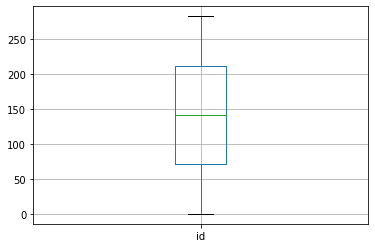

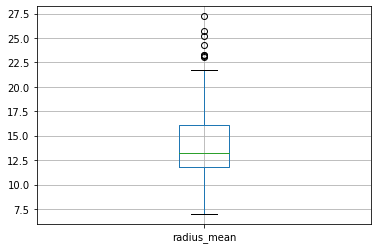

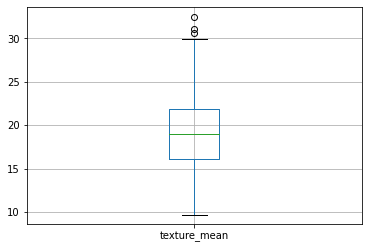

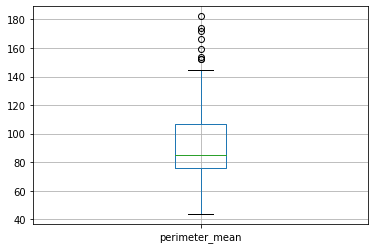

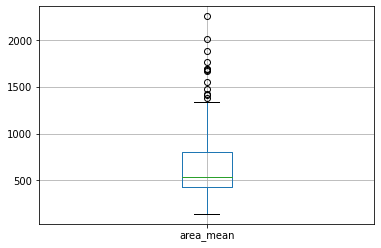

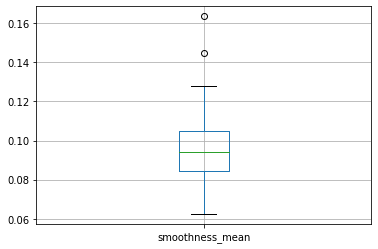

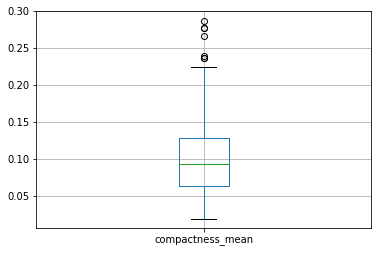

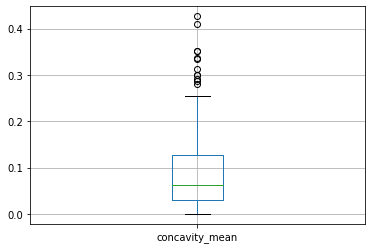

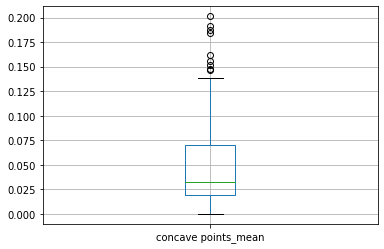

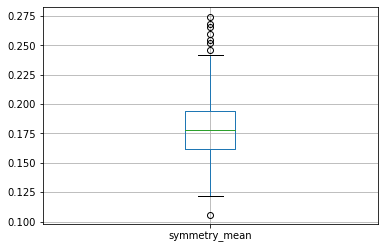

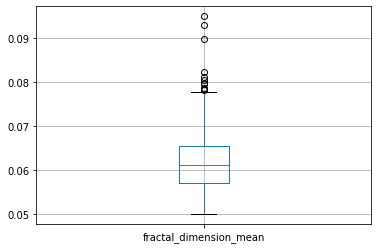

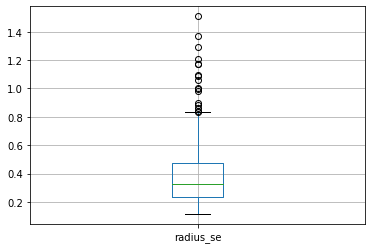

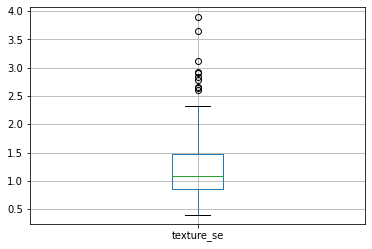

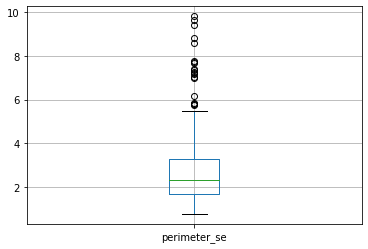

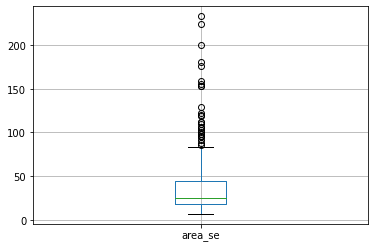

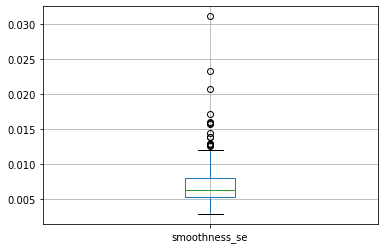

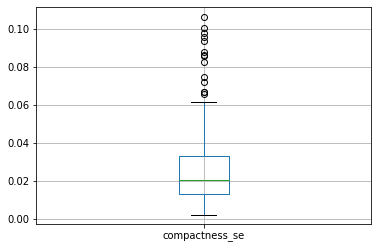

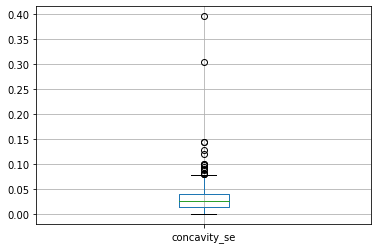

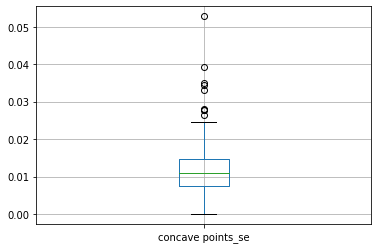

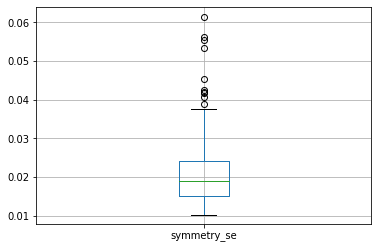

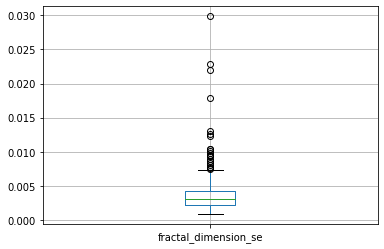

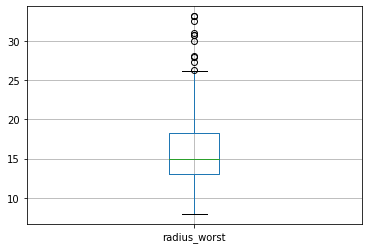

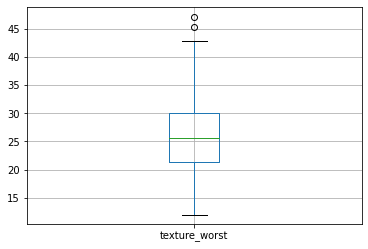

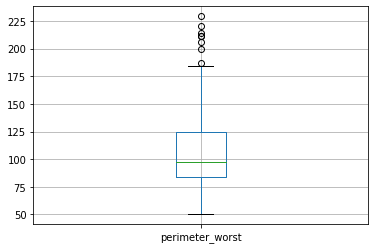

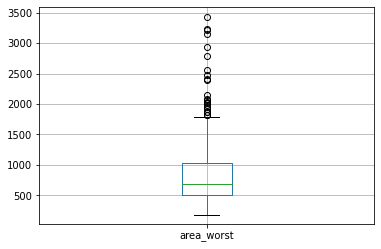

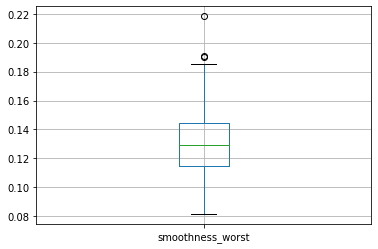

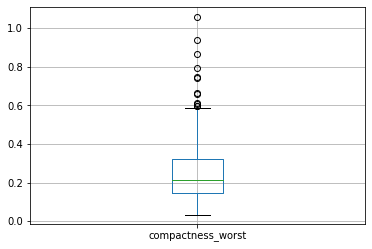

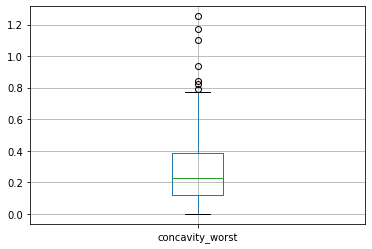

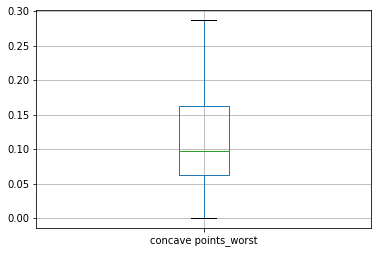

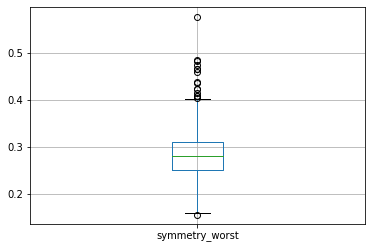

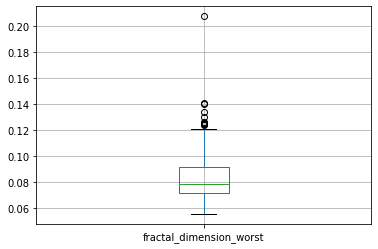

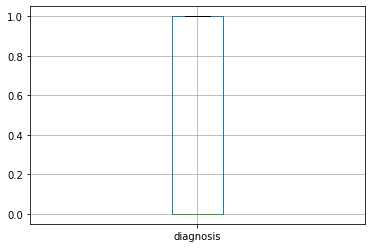

In [ ]:
for column in train_data:
    plt.figure()
    train_data.boxplot([column])

# **Splitting the dataset**

Here we drop any duplicates in the data, create our target label y, and our training data X, and split them using train_test_split.

I tested different values for test_size and .25 seems to be the most consistently well-performing value for the dataset.

In [ ]:
from sklearn.model_selection import train_test_split

y = train_data['diagnosis']
X = train_data.drop(['id', 'diagnosis'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15, stratify=y)

# **Determining which model to use**

This section explores a few different naive bayes models and their metrics for the dataset.


I neglected to test the Bernoulli Naive Bayes, and the Categorical Naive Bayes since Bernoulli is intended for binary-valued features, and Categorical Naives Bayes is intended for categorical features, while this dataset consists of continuous values. An imputer is added to handle any missing values in the dataset.

**Note:** I did not apply any data pruning, normalization, or preprocessing steps. This is because whenever i tried adjusting the data to better fit the model, it resulted in a lower submission score while increasing the local f1 score. I presume this is because of overfitting due to the way our model of choice works. I will expand on this presumption later in the notebook.

**Also Note:** I removed the code, as it would make for a messy notebook. But here are some of the methods of preprocessing that I implemented before I realized that the base model produced the benchmark.

*   Scaling/Normalization
*   Outlier Removal
*   Equal Frequency Binning
*   Feature Selection (Using SelectFromModel/Regression, and SelectKBest)



In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Multinomial Naive Bayes
mnb_pipe = Pipeline(steps=[('imp', SimpleImputer(strategy='mean')),
                           ('mnb', MultinomialNB())])

# Complement Naive Bayes
cnb_pipe = Pipeline(steps=[('imp', SimpleImputer(strategy='mean')),
                           ('gnb', ComplementNB())])

# Gaussian Naive Bayes
gnb_pipe = Pipeline(steps=[('imp', SimpleImputer(strategy='mean')),
                           ('gnb', GaussianNB())])

**Fitting the base models and generating our predictions.**

In [ ]:
# Multinomail Naive Bayes
mnb_pipe.fit(X_train, y_train)
mnb_training_pred = mnb_pipe.predict(X_train)
mnb_testing_pred = mnb_pipe.predict(X_test)

# Complement Naive Bayes
cnb_pipe.fit(X_train, y_train)
cnb_training_pred = cnb_pipe.predict(X_train)
cnb_testing_pred = cnb_pipe.predict(X_test)

# Gaussian Naive Bayes
gnb_pipe.fit(X_train, y_train)
gnb_training_pred = gnb_pipe.predict(X_train)
gnb_testing_pred = gnb_pipe.predict(X_test)

**Accuracy**

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


<Figure size 432x288 with 0 Axes>

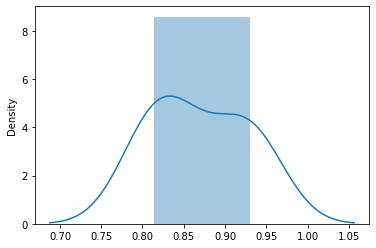

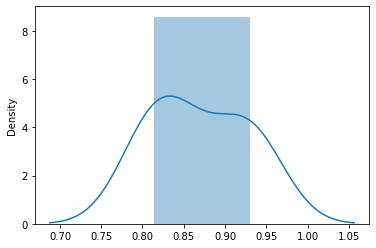

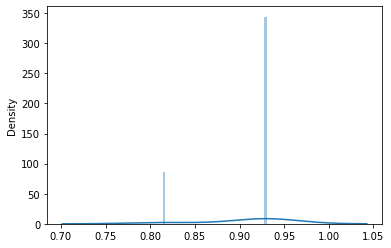

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

mnb_train_results_accuracy = cross_val_score(mnb_pipe, X_train, y_train, cv=None, n_jobs=-1, scoring='accuracy', verbose=1)
mnb_test_results_accuracy = cross_val_score(mnb_pipe, X_test, y_test, cv=None, n_jobs=-1, scoring='accuracy', verbose=1)
sns.distplot(mnb_train_results_accuracy)
plt.figure()

cnb_train_results_accuracy = cross_val_score(cnb_pipe, X_train, y_train, cv=None, n_jobs=-1, scoring='accuracy', verbose=1)
cnb_test_results_accuracy = cross_val_score(cnb_pipe, X_test, y_test, cv=None, n_jobs=-1, scoring='accuracy', verbose=1)
sns.distplot(cnb_train_results_accuracy)
plt.figure()

gnb_train_results_accuracy = cross_val_score(gnb_pipe, X_train, y_train, cv=None, n_jobs=-1, scoring='accuracy', verbose=1)
gnb_test_results_accuracy = cross_val_score(gnb_pipe, X_test, y_test, cv=None, n_jobs=-1, scoring='accuracy', verbose=1)
sns.distplot(gnb_train_results_accuracy)
plt.figure()


**Roc Auc**

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


<Figure size 432x288 with 0 Axes>

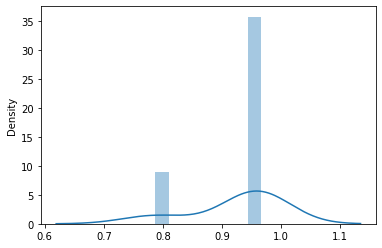

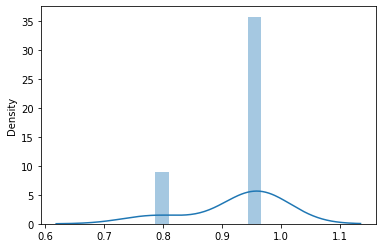

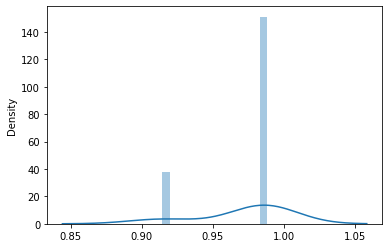

<Figure size 432x288 with 0 Axes>

In [ ]:
mnb_train_results_roc = cross_val_score(mnb_pipe, X_train, y_train, cv=None, n_jobs=-1, scoring='roc_auc', verbose=1)
mnb_test_results_roc = cross_val_score(mnb_pipe, X_test, y_test, cv=None, n_jobs=-1, scoring='roc_auc', verbose=1)
sns.distplot(mnb_train_results_roc)
plt.figure()

cnb_train_results_roc = cross_val_score(cnb_pipe, X_train, y_train, cv=None, n_jobs=-1, scoring='roc_auc', verbose=1)
cnb_test_results_roc = cross_val_score(cnb_pipe, X_test, y_test, cv=None, n_jobs=-1, scoring='roc_auc', verbose=1)
sns.distplot(cnb_train_results_roc)
plt.figure()

gnb_train_results_roc = cross_val_score(gnb_pipe, X_train, y_train, cv=None, n_jobs=-1, scoring='roc_auc', verbose=1)
gnb_test_results_roc = cross_val_score(gnb_pipe, X_test, y_test, cv=None, n_jobs=-1, scoring='roc_auc', verbose=1)
sns.distplot(gnb_train_results_roc)
plt.figure()


**F1**

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


<Figure size 432x288 with 0 Axes>

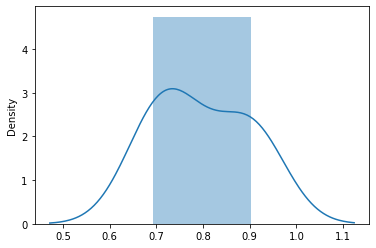

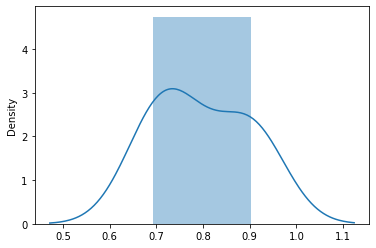

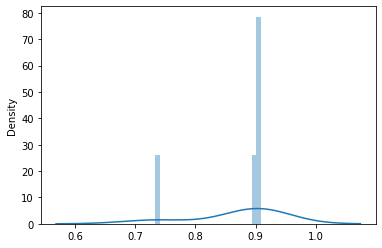

<Figure size 432x288 with 0 Axes>

In [ ]:
mnb_train_results_f1 = cross_val_score(mnb_pipe, X_train, y_train, cv=None, n_jobs=-1, scoring='f1', verbose=1)
mnb_test_results_f1 = cross_val_score(mnb_pipe, X_test, y_test, cv=None, n_jobs=-1, scoring='f1', verbose=1)
sns.distplot(mnb_train_results_f1)
plt.figure()

cnb_train_results_f1 = cross_val_score(cnb_pipe, X_train, y_train, cv=None, n_jobs=-1, scoring='f1', verbose=1)
cnb_test_results_f1 = cross_val_score(cnb_pipe, X_test, y_test, cv=None, n_jobs=-1, scoring='f1', verbose=1)
sns.distplot(cnb_train_results_f1)
plt.figure()

gnb_train_results_f1 = cross_val_score(gnb_pipe, X_train, y_train, cv=None, n_jobs=-1, scoring='f1', verbose=1)
gnb_test_results_f1 = cross_val_score(gnb_pipe, X_test, y_test, cv=None, n_jobs=-1, scoring='f1', verbose=1)
sns.distplot(gnb_train_results_f1)
plt.figure()


# **Decision Time**

From our distribution plots we can see that among the 3 the Gaussian Naive Bayes model is the one finding the most support in the 90s for it's metrics, and so we will be using it for our dataset.

I believe this is due to the data fitting a gaussian or 'normal' distribution.

**Note:** Since I've found the base model to work best, I've tidied away unnecessary code, including my grid search. I will not use a grid search to adjust hyperparameters in this assignment, because there is no longer anything to test for, aside from smoothing levels, which the default seems to work best here.





**Generating our predictions.**

In [ ]:
train_pred = gnb_pipe.predict(X_train)
test_pred = gnb_pipe.predict(X_test)

**Generating a classification report.**

In [ ]:
from sklearn.metrics import classification_report

print() ; print('Train split results...'); print()
print(classification_report(y_train, train_pred))

print() ; print('Test split results...'); print()
print(classification_report(y_test, test_pred))



Train split results...

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       133
           1       0.93      0.84      0.88        80

    accuracy                           0.92       213
   macro avg       0.92      0.90      0.91       213
weighted avg       0.92      0.92      0.91       213


Test split results...

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       0.96      0.92      0.94        26

    accuracy                           0.96        71
   macro avg       0.96      0.95      0.95        71
weighted avg       0.96      0.96      0.96        71



# **Output**

Generates and saves our test data's predictions to a CSV file named 'my_submission.csv'

In [ ]:
X_test=test_data.drop('id', axis=1)
test_pred = gnb_pipe.predict(X_test)

output = pd.DataFrame({'id': test_data.id, 'diagnosis': test_pred.astype(int)})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")
output

Your submission was successfully saved!


,id,diagnosis
0,0,0
1,1,0
2,2,0
3,3,1
4,4,1
...,...,...
280,280,0
281,281,1
282,282,0
283,283,0
